In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from cosmosis.model import tv_model, ResBam
from cosmosis.learning import Learn, Selector, Metrics
from cosmosis.dataset import LoadImage, AsTensor, Transpose, ImageDatasetStats, Squeeze

from dataset import Ranzcr
from learning import RSelector

from torch.optim import Adam
from torch.nn import BCEWithLogitsLoss, CrossEntropyLoss
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torchvision import transforms

from IPython.display import display


In [2]:
ds_params={'embed': [],
            'image_dir': './data/ranzcr/train',
            'target_csv': './data/ranzcr/train.csv',
            'target_type': 'ETT',
            'transform': transforms.Compose([LoadImage(),
                                             transforms.Resize(512),
                                             ]),
            'target_transform': None}

ds = Ranzcr(**ds_params)
ids = ImageDatasetStats(ds)
    
print(ids.stats.mean) #123.2/255=.483
print(ids.stats.stddev) #59.6/255=.234

CDataset created...
images to process: 30083
images processed: 10000
images processed: 20000
images processed: 30000
mean: [123.22340491477173], stddev: [59.58895121247066]
[123.22340491477173]
[59.58895121247066]


CDataset created...
CDataset created...
CDataset created...
CModel loaded...
ResBam model loaded...
learning time: 0:00:48.255774
epoch: 0, lr: 0.005
train loss: 1.0967584816554121, val loss: 0.918281152844429
sk_train_log: 0.7330518460798513, sk_val_log: 0.7111893128764273
learning time: 0:01:33.375443
epoch: 1, lr: 0.005
train loss: 0.7867394280797653, val loss: 0.6901069166404861
sk_train_log: 0.6757973210465469, sk_val_log: 0.7712742071777382
learning time: 0:02:18.741606
epoch: 2, lr: 0.005
train loss: 0.7019095450412226, val loss: 0.680182301572391
sk_train_log: 0.6983160848415932, sk_val_log: 0.746703400152696
learning time: 0:03:04.422261
epoch: 3, lr: 0.005
train loss: 0.6589340540288969, val loss: 0.6322678625583649
sk_train_log: 0.7122456615391095, sk_val_log: 0.7592353387822315
learning time: 0:03:49.767003
epoch: 4, lr: 0.005
train loss: 0.6392860028124948, val loss: 0.605638501899583
sk_train_log: 0.751513262982355, sk_val_log: 0.7446352856931109
learning time: 0:04:35.43

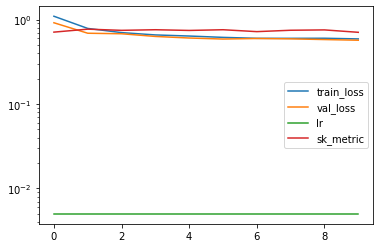

In [3]:
ds_params={'train_params': {'embed': [],
                            'image_dir': './data/ranzcr/train',
                            'target_csv': './data/ranzcr/train.csv',
                            'target_type': 'ETT',
                            'transform': transforms.Compose([LoadImage(),
                                                             transforms.Resize(1000),
                                                             transforms.RandomRotation(10),
                                                             transforms.CenterCrop(800),
                                                             transforms.RandomCrop(512),
                                                             transforms.ToTensor(),
                                                             transforms.Normalize(.483,.234),
                                                             ]),
                            'target_transform': transforms.Compose([
                                                               AsTensor(),
                                                               Squeeze()])},
           'val_params': {'embed': [],
                          'image_dir': './data/ranzcr/train',
                          'target_csv': './data/ranzcr/train.csv',
                          'target_type': 'ETT',
                          'transform': transforms.Compose([LoadImage(),
                                                           transforms.Resize(1000),
                                                           transforms.CenterCrop(512),
                                                           transforms.ToTensor(),
                                                           transforms.Normalize(.483,.234),
                                                           ]),
                          'target_transform': transforms.Compose([
                                                               AsTensor(),
                                                               Squeeze()])},
           'test_params': {'embed': [],
                           'image_dir': './data/ranzcr/train',
                           'target_csv': './data/ranzcr/train.csv',
                           'target_type': 'ETT',
                           'transform': transforms.Compose([LoadImage(),
                                                            transforms.Resize(1000),
                                                            transforms.CenterCrop(512),
                                                            transforms.ToTensor(),
                                                            transforms.Normalize(.483,.234),
                                                            ]),
                          'target_transform': transforms.Compose([
                                                               AsTensor(),
                                                               Squeeze()])}}

model_params = {'n_classes': 4,
                'residual': True,
                'in_channels': 1,
                'groups': 1,
                'bam': True,
                'dropout': [False,False,False,False,False],
                #'act': None
               }

metrics_params = {'report_interval': 10, 
                  'sk_metric_name': 'roc_auc_score', 
                  'sk_params': {'average': 'macro',
                                'multi_class': 'ovr'}}
    
opt_params = {'lr': 0.005}

crit_params = {'reduction': 'sum'}

#RSelector balances classes (target_type) of the Ranzcr ds
#sample_params = {'set_seed': False,
#                 'splits': (.7,.15),
#                 'target_type': 'ETT',
#                 'subset': False}

sample_params = {'set_seed': 88,
                 'splits': (.7,.15),
                 'subset': .1}

sched_params = {'factor': .5,
                'patience': 2,
                'cooldown': 1}

learn = Learn([Ranzcr,Ranzcr,Ranzcr], 
              ResBam, 
              Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss, 
              model_params=model_params, ds_params=ds_params, 
              sample_params=sample_params, opt_params=opt_params, 
              sched_params=sched_params, crit_params=crit_params,
              metrics_params=metrics_params,
              adapt=False, load_model=False, load_embed=False, save_model=False,
              batch_size=16, epochs=10)


In [ ]:
train loss: 0.5965401894263639, val loss: 0.5782928780785629
sk_train_log: 0.7061991022457317, sk_val_log: 0.7740062786364664
test loss: 0.5892264470458031
learning time: 0:07:47.561036
test sklean metric: 
0.7407776497160243 